In [1]:
%matplotlib inline
import networkx as nx
from datetime import datetime
import pandas as pd
from itertools import combinations

# Create graphs from csv with affiliation, via edgelists
Affiliation: nodes belong to a group_id, eg. household, school, company

Objective: Create cliques in households, or pseudo cliques in school/company according to the given degree of nodes

In [2]:
df_a = pd.read_csv('pro_contacts_adults.csv')
df_c = pd.read_csv('pro_contacts_children.csv')

In [3]:
df_a = df_a[['household_id','adult_id']]
df_a.rename(columns={'adult_id':'node_id'}, inplace=True)
df_a.head()

,household_id,node_id
0,0,0
1,0,1
2,1,2
3,1,3
4,2,4


In [4]:
df_c = df_c[['household_id','child_id']]
df_c.rename(columns={'child_id':'node_id'}, inplace=True)

In [5]:
# concatenation top/bottom
df=pd.concat([df_a,df_c], axis=0)
# After concatenation, my index is screwed up: it counts up to n 
# (where n is the shape[0] of the corresponding dataframe), and restarts at zero at the next dataframe.
df=df.reset_index(drop=True)
print("len(df_a): %d, len(df_c): %d, len(df): %d" %(len(df_a),len(df_c),len(df)))

len(df_a): 6960, len(df_c): 3085, len(df): 10045


In [6]:
df.tail(3)

,household_id,node_id
10042,2468,10042
10043,2469,10043
10044,2470,10044


Now we can easily get the nodes in each household, and build edgelists such as nodes in the same household form a clique




In [7]:
gb=df.groupby('household_id')
gb.groups
# a dict with with households as keys, and lists of nodes index as values
# Each value is a sequence of the index locations for the rows belonging to that particular group

{0: Int64Index([0, 1, 6960, 6961], dtype='int64'),
 1: Int64Index([2, 3, 6962], dtype='int64'),
 2: Int64Index([4, 5, 6], dtype='int64'),
 3: Int64Index([7, 8, 6963, 6964], dtype='int64'),
 4: Int64Index([9, 10, 6965, 6966], dtype='int64'),
 5: Int64Index([11, 12, 13], dtype='int64'),
 6: Int64Index([14, 15, 16], dtype='int64'),
 7: Int64Index([17, 18, 6967], dtype='int64'),
 8: Int64Index([19, 20, 6968], dtype='int64'),
 9: Int64Index([21, 22, 6969, 6970], dtype='int64'),
 10: Int64Index([23, 24, 6971, 6972, 6973, 6974], dtype='int64'),
 11: Int64Index([25, 26, 6975, 6976, 6977, 6978], dtype='int64'),
 12: Int64Index([27, 28, 29], dtype='int64'),
 13: Int64Index([30, 31, 6979, 6980], dtype='int64'),
 14: Int64Index([32, 33, 6981, 6982], dtype='int64'),
 15: Int64Index([34, 35, 36, 6983, 6984, 6985], dtype='int64'),
 16: Int64Index([37, 38, 39], dtype='int64'),
 17: Int64Index([40, 41, 6986], dtype='int64'),
 18: Int64Index([42, 43, 6987], dtype='int64'),
 19: Int64Index([44, 45, 6988]

In [8]:
# Get the value for index 6960
df['node_id'].iloc[6960]

6960

In [9]:
df[df.household_id==18]

,household_id,node_id
42,18,42
43,18,43
6987,18,6987


In [10]:
# Create edgelists within groups. Undirected edges
# k-combinations of an n-element set, k=2
items = ['a', 'b', 'c']
for c in combinations(items, 2):
    print(c)

('a', 'b')
('a', 'c')
('b', 'c')


In [11]:
edgelist=[]
for name,group in gb.groups.items():
    for (index1,index2) in combinations(group, 2):
        edgelist.append((df['node_id'].iloc[index1],df['node_id'].iloc[index2]))
edgelist

[(0, 1),
 (0, 6960),
 (0, 6961),
 (1, 6960),
 (1, 6961),
 (6960, 6961),
 (2, 3),
 (2, 6962),
 (3, 6962),
 (4, 5),
 (4, 6),
 (5, 6),
 (7, 8),
 (7, 6963),
 (7, 6964),
 (8, 6963),
 (8, 6964),
 (6963, 6964),
 (9, 10),
 (9, 6965),
 (9, 6966),
 (10, 6965),
 (10, 6966),
 (6965, 6966),
 (11, 12),
 (11, 13),
 (12, 13),
 (14, 15),
 (14, 16),
 (15, 16),
 (17, 18),
 (17, 6967),
 (18, 6967),
 (19, 20),
 (19, 6968),
 (20, 6968),
 (21, 22),
 (21, 6969),
 (21, 6970),
 (22, 6969),
 (22, 6970),
 (6969, 6970),
 (23, 24),
 (23, 6971),
 (23, 6972),
 (23, 6973),
 (23, 6974),
 (24, 6971),
 (24, 6972),
 (24, 6973),
 (24, 6974),
 (6971, 6972),
 (6971, 6973),
 (6971, 6974),
 (6972, 6973),
 (6972, 6974),
 (6973, 6974),
 (25, 26),
 (25, 6975),
 (25, 6976),
 (25, 6977),
 (25, 6978),
 (26, 6975),
 (26, 6976),
 (26, 6977),
 (26, 6978),
 (6975, 6976),
 (6975, 6977),
 (6975, 6978),
 (6976, 6977),
 (6976, 6978),
 (6977, 6978),
 (27, 28),
 (27, 29),
 (28, 29),
 (30, 31),
 (30, 6979),
 (30, 6980),
 (31, 6979),
 (31, 6980

In [12]:
len(edgelist)

12519

Now we can load a networkX graph, and/or save the list in csv file...

[NetworkX](https://networkx.github.io/documentation/stable/reference/classes/graph.html)

In [13]:
G = nx.Graph()
G.add_edges_from(edgelist)
G.number_of_edges()

12519

# Create graph without edgelists as input



Some ideas:

* for friendship networks: To simulate friendship, you'll have to generate edges by yourselves. No pre-defined "affiliation" is given... as friendship are real networks... and real networks of many different types share some common properties. Do you recall them? See Chapter 5 of THE book.

* for professional networks: Generate graphs with a given degree sequence or expected degree sequence to fit professional contacts, instead of using school/company affiliation


[Graph generators (implementation of several networks models) with NetworkX](https://networkx.github.io/documentation/stable/reference/generators.html)

In [14]:
print(datetime.now())
G=nx.barabasi_albert_graph(50000, 5, seed=None)
print(datetime.now())

2020-04-02 17:39:00.635302
2020-04-02 17:39:01.512740


In [15]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 50000
Number of edges: 249975
Average degree:   9.9990


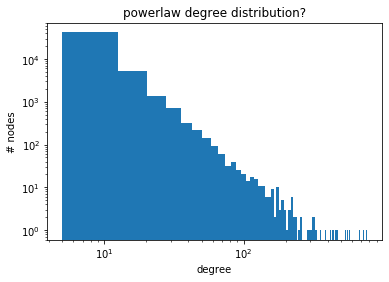

In [16]:
# Draw the degree distribution. If powerlow distribution, the graph shows one of the properties
# of a real (complex) network, such as social networks, biological networks, internet networks.
import matplotlib.pyplot as plt
plt.figure(num=None)
fig = plt.figure(1)
degree_sequence = [G.degree(n) for n in G.nodes]
#counts, bins, patches = plt.hist(degree_sequence, bins='auto')
plt.hist(degree_sequence, bins=100)
plt.title("powerlaw degree distribution?")
plt.ylabel("# nodes")
plt.xlabel("degree")
plt.yscale('log')
plt.xscale('log')
plt.show()
#del fig